# Programming Exercise 1 - Linear Regression

In [33]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')


## warmUpExercise

In [34]:
def warmUpExercise():
  return(np.identity(5))

In [35]:
warmUpExercise()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

## Linear regression with one variable

In [41]:
cwd = os.getcwd()
path = cwd + '/notebooks/data/ex1data1.txt'
data = np.loadtxt(path, delimiter = ',')
X = np.c_[np.ones(data.shape[0]), data[:, 0]]
y = np.c_[data[:, 1]]

Text(0,0.5,'Profit in $10,000s')

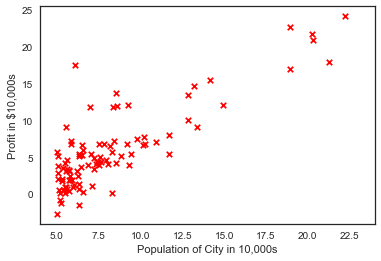

In [45]:
plt.scatter(X[:, 1], y, s = 30, c = 'r', marker = 'x', linewidths = 1)
plt.xlim(4, 24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

In [53]:
def computeCost(X, y, theta = [[0], [0]]):
  m = y.size
  J = 0
  h = X.dot(theta)
  J = 1 / (2 * m) * np.sum(np.square(h - y))
  return (J)


In [54]:
computeCost(X, y)

32.072733877455676

In [55]:
def gradientDescent(X, y, theta = [[0], [0]], alpha = 0.1, num_iters = 1500):
  m = y.size
  J_history = np.zeros(num_iters)
  for iter in np.arange(num_iters):
    h = X.dot(theta)
    theta = theta - alpha * (1 / m) * (X.T.dot(h - y))
    J_history[iter] = computeCost(X, y, theta)
  return (theta, J_history)
  
